In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

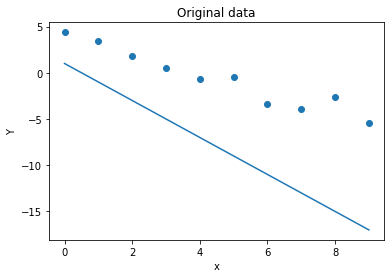

In [16]:
n = 10
x = range(n)
x2 = range(n+10,n+20)

x_train = np.array(x, dtype=np.float32) # float32 customary in ML big data
x_train = x_train.reshape(-1, 1)        # Change from vector to 2-d array
x_train2 = np.array(x, dtype=np.float32) 
x_train2 = x_train2.reshape(-1, 1)        
c1 = -2.                      # to make it random: np.random.randn()
c2 = 1.                       # to make it random: np.random.randn()
c3 = 4.
y_train = c1*x_train + c2*x_train2 + c3
y_train = np.array(y_train + np.random.randn(n,1), dtype=np.float32)

plt.scatter(x_train, y_train)
plt.xlabel("x")
plt.ylabel("Y")
plt.title("Original data")
plt.plot(x_train, c1*x_train+c2)
plt.show()

(tensor(-0.4956), tensor(-0.4956), tensor(3.7567))

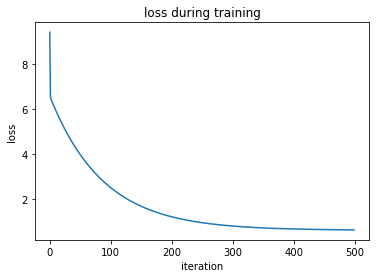

In [18]:
import torch
import torch.nn as nn
from torch.autograd import Variable

def forward(x,x2):                      # forward pass: use model to predict outputs
  return w1*x + w2*x2 + b

def criterion(yhat,y):                    # mean square error
  return torch.mean((yhat-y)**2)

LOSS = []
lr = 0.01
w1 = torch.tensor(0., requires_grad=True) # data parameters with initial guess
w2 = torch.tensor(0., requires_grad=True) # data parameters with initial guess
b = torch.tensor(-0.5, requires_grad=True)
x_traint = torch.tensor(x_train) # convert to pytorch tensors
x_train2t = torch.tensor(x_train2) # convert to pytorch tensors
y_traint = torch.tensor(y_train)

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(x_traint,x_train2t)
        
        # calculate the loss, where criterion is mean-square error (see above)
        loss = criterion(Yhat, y_traint)
            
        # store the loss in the list LOSS
        LOSS.append(loss.detach()) # detach lets Python deal w/ Pytorch tensors
        
        # backward pass, find gradient of loss wrt parameters
        loss.backward()
        
        # Stochastic gradient descent: update parameters slope and bias
        w1.data = w1.data - lr * w1.grad.data
        w2.data = w2.data - lr * w2.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        b.grad.data.zero_()

train_model(500)
plt.plot(LOSS)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("loss during training")
w1.detach(), w2.detach(), b.detach()